https://github.com/patrickloeber/python-engineer-notebooks/blob/master/advanced-python/14-Generators.ipynb
Generators
Generators are functions that can be paused and resumed on the fly, returning an object that can be iterated over. Unlike lists, they are lazy and thus produce items one at a time and only when asked. So they are much more memory efficient when dealing with large datasets.
A generator is defined like a normal function but with the yield statement instead of return.

def my_generator():
    yield 1
    yield 2
    yield 3
Execution of a generator function
Calling the function does not execute it. Instead, the function returns a generator object which is used to control execution. Generator objects execute when next() is called. When calling next() the first time, execution begins at the start of the function and continues until the first yield statement where the value to the right of the statement is returned. Subsequent calls to next() continue from the yield statement (and loop around) until another yield is reached. If yield is not called because of a condition or the end is reached, a StopIteration exception is raised:

In [2]:
def countdown(num):
    print('Starting')
    while num > 0:
        yield num
        num -= 1



In [3]:
# this will not print 'Starting'
cd = countdown(3)



In [4]:
# this will print 'Starting' and the first value
print(next(cd))



Starting
3


In [5]:
# will print the next values
print(next(cd))


2


In [6]:
print(next(cd))

# this will raise a StopIteration
print(next(cd))
     

1


StopIteration: 

In [7]:
# you can iterate over a generator object with a for in loop
cd = countdown(3)
for x in cd:
    print(x)

Starting
3
2
1


In [1]:
import pandas as pd

def collatz_steps(n):
    steps = 0
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1
    return steps

# Create a list to store data
data = []

# Input a range of positive integers
start_num = int(input("Enter the starting positive integer: "))
end_num = int(input("Enter the ending positive integer: "))

if start_num <= 0 or end_num <= 0 or start_num > end_num:
    print("Please enter valid positive integers.")
else:
    for num in range(start_num, end_num + 1):
        steps = collatz_steps(num)
        data.append({'Number': num, 'Steps to 1': steps})

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

         Number  Steps to 1
0             1           0
1             2           1
2             3           7
3             4           2
4             5           5
...         ...         ...
999995   999996         113
999996   999997         113
999997   999998         258
999998   999999         258
999999  1000000         152

[1000000 rows x 2 columns]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to extract the first digit
def extract_first_digit(number):
    while number >= 10:
        number //= 10
    return number

# Apply the function to the 'Numbers' column
df['First Digit'] = df['Steps to 1'].apply(extract_first_digit)

# Count the occurrences of each number in the 'Numbers' column
number_counts = df['First Digit'].value_counts()



In [ ]:
# Calculate the expected Benford's Law distribution
benford_distribution = np.log10(1 + 1 / np.arange(1, 10))

# Normalize the counts to match the expected distribution
normalized_counts = first_digit_counts / first_digit_counts.sum()

# Plot the actual and expected distributions
plt.bar(range(1, 10), normalized_counts, label='Actual Distribution')
plt.plot(range(1, 10), benford_distribution, marker='o', linestyle='--', color='r', label="Benford's Law")
plt.xlabel('First Digit')
plt.ylabel('Normalized Frequency')
plt.title('Benford\'s Law Test on Column')
plt.xticks(range(1, 10))
plt.legend()
plt.show()

In [8]:
# you can use it for functions that take iterables as input
cd = countdown(3)
sum_cd = sum(cd)
print(sum_cd)

cd = countdown(3)
sorted_cd = sorted(cd)
print(sorted_cd)

Starting
6
Starting
[1, 2, 3]


Big advantage: Generators save memory!
Since the values are generated lazily, i.e. only when needed, it saves a lot of memory, especially when working with large data. Furthermore, we do not need to wait until all the elements have been generated before we start to use them.

In [9]:
# without a generator, the complete sequence has to be stored here in a list
def firstn(n):
    num, nums = 0, []
    while num < n:
        nums.append(num)
        num += 1
    return nums

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)
import sys
print(sys.getsizeof(firstn(1000000)), "bytes")

499999500000
8448728 bytes


In [10]:
# with a generator, no additional sequence is needed to store the numbers
def firstn(n):
    num = 0
    while num < n:
        yield num
        num += 1

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)
import sys
print(sys.getsizeof(firstn(1000000)), "bytes")

499999500000
200 bytes


Another example: Fibonacci numbers

In [12]:
def fibonacci(limit):
    a, b = 1, 1 # first two fibonacci numbers
    while a < limit:
        yield a
        a, b = b, a + b

fib = fibonacci(30)
# generator objects can be converted to a list (only used for printing here)
print(list(fib))

[1, 1, 2, 3, 5, 8, 13, 21]


Generator expressions
Just like list comprehensions, generators can be written in the same syntax except with parenthesis instead of square brackets. Be careful not to mix them up, since generator expressions are often slower than list comprehensions because of the overhead of function calls 
(https://stackoverflow.com/questions/11964130/list-comprehension-vs-generator-expressions-weird-timeit-results/11964478#11964478)

In [15]:
# generator expression
mygenerator = (i for i in range(1000) if i % 2 == 0)
print(sys.getsizeof(mygenerator))

# list comprehension
mylist = [i for i in range(1000) if i % 2 == 0]
print(sys.getsizeof(mylist))

208
4216


Concept behind a generator
This class implements our generator as an iterable object. It has to implement __iter__ and __next__ to make it iterable, keep track of the current state (the current number in this case), and take care of a StopIteration. It can be used to understand the concept behind generators. However, there is a lot of boilerplate code, and the logic is not as clear as with a simple function using the yield keyword.

In [16]:
class firstn:
    def __init__(self, n):
        self.n = n
        self.num = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.num < self.n:
            cur = self.num
            self.num += 1
            return cur
        else:
            raise StopIteration()
             
firstn_object = firstn(1000000)
print(sum(firstn_object))

499999500000


Collatz sequence:
[121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]


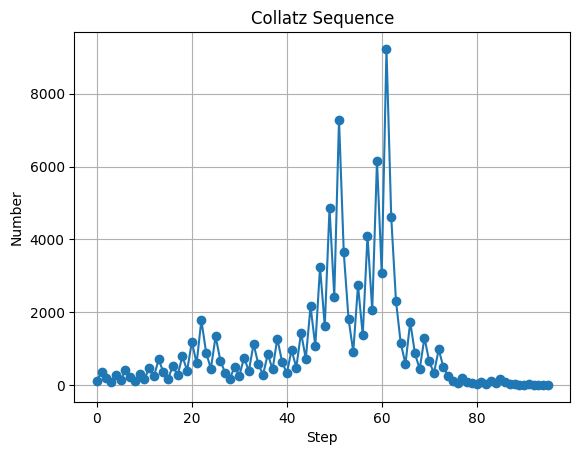

In [18]:
import matplotlib.pyplot as plt

def collatz_sequence(n):
    sequence = [n]
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        sequence.append(n)
    return sequence

# Input a starting number
start_num = int(input("Enter a starting number: "))

if start_num <= 0:
    print("Please enter a positive integer.")
else:
    sequence = collatz_sequence(start_num)
    print("Collatz sequence:")
    print(sequence)
    
    # Plot the sequence
    plt.plot(sequence, marker='o')
    plt.xlabel('Step')
    plt.ylabel('Number')
    plt.title('Collatz Sequence')
    plt.grid()
    plt.show()
